[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1tsbLl_yB9lcC_lo4sjwEoI0r1KAjPkoB)

# CRISPR Reporter Screen analysis with bean

In this tutorial, we will cover
*  Obtaining target variant editing rate from allele count information
*  ReporterScreen object slicing (indexing)
*  Allele filtering based on significance

For the basic API of ReporterScreen object, see [**perturb-tools tutorial of Screen API**](https://github.com/pinellolab/perturb-tools/blob/main/perturb_tools/screen_demo.ipynb).

In [2]:
! pip install beans==0.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 464 kB 4.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 147 kB 51.2 MB/s 
     |████████████████████████████████| 11.2 MB 51.2 MB/s 
     |████████████████████████████████| 96 kB 4.9 MB/s 
     |████████████████████████████████| 2.3 MB 57.1 MB/s 
     |████████████████████████████████| 959 kB 44.2 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 128 kB 66.4 MB/s 
  Created wheel for beans: filename=beans-0.1.2-cp37-cp37m-linux_x86_64.whl size=506725 sha256=43eb6b2b41a112f7ea2d37a17e1e9bd91dffd4599710f3958769f84e59b3e6b8
  Stored in directory: /root/.cache/pip/wheels/68/81/58/49b78bc024e2a5312dc830797a25c15c7acda4225b5b25d232
  Created wheel for perturb-tools: filename=pert

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import bean as be

In [33]:
!gdown 18Azb8YmmMvFZo9urc2TxZr540xXWOv_v

Downloading...
From: https://drive.google.com/uc?id=18Azb8YmmMvFZo9urc2TxZr540xXWOv_v
To: /content/bean_count_072121_ABE_topbot_LDLvar.h5ad
100% 40.2M/40.2M [00:00<00:00, 160MB/s]


In [2]:
bdata = be.read_h5ad("bean_count_072121_ABE_topbot_LDLvar.h5ad")

In [35]:
bdata.uns["allele_counts"]

,guide,allele,rep1_bot,rep2_bot,rep3_VPA_bot,rep4_VPA_bot,rep1_bulk,rep2_bulk,rep3_VPA_bulk,rep4_VPA_bulk,rep1_top,rep2_top,rep3_VPA_top,rep4_VPA_top
0,LDLR_SA_3_g5,,26,13,9,13,60,21,27,31,32,26,43,43
1,LDLR_SA_3_g5,0:13:+:A>G,6,16,11,24,29,21,28,22,27,11,20,13
2,LDLR_SA_3_g5,"-12:1:+:A>G,0:13:+:A>G",2,16,1,24,16,5,9,4,17,12,7,3
3,LDLR_SA_3_g5,"0:13:+:A>G,7:20:+:A>G",2,0,0,0,0,0,0,9,0,0,0,0
4,LDLR_SA_3_g5,"-12:1:+:A>G,-8:5:+:A>G,0:13:+:A>G,10:23:+:A>G",1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165506,2:164588224GAG_Maj_ABE_10_g3,"-10:1:+:C>T,-8:3:+:A>T",0,0,0,0,0,0,0,0,0,0,0,1
165507,2:164588224GAG_Maj_ABE_10_g3,"-8:3:+:A>T,-3:8:+:C>A,-1:10:+:G>A",0,0,0,0,0,0,0,0,0,0,0,1
165508,rs4921914_Min_ABE_501_g4,"-9:3:+:A>G,-8:4:+:A>G,-3:9:+:A>G,2:14:+:A>G,4:...",0,0,0,0,0,0,0,0,0,0,0,1
165509,rs191388787_Maj_ABE_121_g2,"-7:3:+:A>G,-5:5:+:A>G,-3:7:+:A>G",0,0,0,0,0,0,0,0,0,0,0,1


## Subsetting & addition



Works as anndata, supports allele & edit count operations.


### Subsetting & selection


In [3]:
bdata.samples["replicate"], bdata.samples["sort"] = zip(*bdata.samples.index.map(lambda s: s.rsplit("_", 1)))

In [39]:
bdata_subset = bdata[:10,bdata.samples.sort == "bulk"]

In [4]:
bdata.uns["allele_counts"] = bdata.uns['allele_counts'].loc[bdata.uns['allele_counts'].allele.map(str) != ""]

## Getting edit rates from allele counts



In [42]:
bdata.uns['allele_counts']

,guide,allele,rep1_bot,rep2_bot,rep3_VPA_bot,rep4_VPA_bot,rep1_bulk,rep2_bulk,rep3_VPA_bulk,rep4_VPA_bulk,rep1_top,rep2_top,rep3_VPA_top,rep4_VPA_top
1,LDLR_SA_3_g5,0:13:+:A>G,6,16,11,24,29,21,28,22,27,11,20,13
2,LDLR_SA_3_g5,"-12:1:+:A>G,0:13:+:A>G",2,16,1,24,16,5,9,4,17,12,7,3
3,LDLR_SA_3_g5,"0:13:+:A>G,7:20:+:A>G",2,0,0,0,0,0,0,9,0,0,0,0
4,LDLR_SA_3_g5,"-12:1:+:A>G,-8:5:+:A>G,0:13:+:A>G,10:23:+:A>G",1,0,0,0,0,0,0,0,0,0,0,0
5,LDLR_SA_3_g5,"-12:1:+:A>G,0:13:+:A>G,7:20:+:A>G",1,0,0,0,0,2,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165506,2:164588224GAG_Maj_ABE_10_g3,"-10:1:+:C>T,-8:3:+:A>T",0,0,0,0,0,0,0,0,0,0,0,1
165507,2:164588224GAG_Maj_ABE_10_g3,"-8:3:+:A>T,-3:8:+:C>A,-1:10:+:G>A",0,0,0,0,0,0,0,0,0,0,0,1
165508,rs4921914_Min_ABE_501_g4,"-9:3:+:A>G,-8:4:+:A>G,-3:9:+:A>G,2:14:+:A>G,4:...",0,0,0,0,0,0,0,0,0,0,0,1
165509,rs191388787_Maj_ABE_121_g2,"-7:3:+:A>G,-5:5:+:A>G,-3:7:+:A>G",0,0,0,0,0,0,0,0,0,0,0,1


In [5]:
bdata.uns["edit_counts"] = bdata.get_edit_from_allele()

In [12]:
bdata.get_edit_mat_from_uns("A", "G", target_pos_col = "target_pos")

New edit matrix saved in .layers['edits']. Returning old edits.


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
window_edit_rate= bdata.get_guide_edit_rate(normalize_by_editable_base = True,
                   edited_base = "A",
                   editable_base_start = 3,
                   editable_base_end = 8,
                   bcmatch_thres = 5,
                   prior_weight = 1,
                   return_result = True)

(array([579., 364., 299., 249., 221., 214., 191., 134., 159., 133.,  97.,
         90.,  83.,  76.,  70.,  67.,  48.,  53.,  45.,  56.,  38.,  37.,
         32.,  21.,  24.,  15.,   8.,   7.,   1.,   2.]),
 array([4.13052458e-04, 2.89016995e-02, 5.73903465e-02, 8.58789936e-02,
        1.14367641e-01, 1.42856288e-01, 1.71344935e-01, 1.99833582e-01,
        2.28322229e-01, 2.56810876e-01, 2.85299523e-01, 3.13788170e-01,
        3.42276817e-01, 3.70765464e-01, 3.99254111e-01, 4.27742758e-01,
        4.56231405e-01, 4.84720052e-01, 5.13208699e-01, 5.41697346e-01,
        5.70185993e-01, 5.98674640e-01, 6.27163287e-01, 6.55651934e-01,
        6.84140582e-01, 7.12629229e-01, 7.41117876e-01, 7.69606523e-01,
        7.98095170e-01, 8.26583817e-01, 8.55072464e-01]),
 <BarContainer object of 30 artists>)

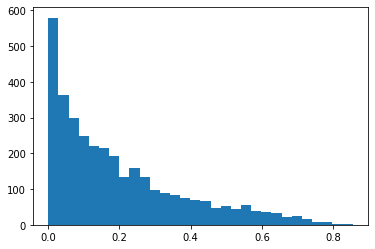

In [14]:
plt.hist(window_edit_rate, bins=30)

# Allele filtering

If you have non-edited control data of reporter (e.g., plasmid library), you can filter out the reporter to select the significant base edits per guides. Significance is determined by Fisher's exact test.

In [16]:
! gdown 153fKJntS-4vlrodC6xlZ9oINQo1XT_i9

Downloading...
From: https://drive.google.com/uc?id=153fKJntS-4vlrodC6xlZ9oINQo1XT_i9
To: /content/bean_count_LDLvar_plasmid.h5ad
100% 5.10M/5.10M [00:00<00:00, 148MB/s]


In [17]:
bdata_plasmid = be.read_h5ad("bean_count_LDLvar_plasmid.h5ad")

In [19]:
bdata_plasmid.uns["allele_counts"] = bdata_plasmid.uns['allele_counts'].loc[bdata_plasmid.uns['allele_counts'].allele.map(str) != ""]

Allele filtering may take few minutes depending on the number of alleles in the data.

In [ ]:
q_val_sig, bdata.uns['sig_allele_counts'] = be.filter_alleles(
    bdata, bdata_plasmid, filter_each_sample = True, run_parallel = True, allele_counts_key="allele_counts", map_to_filtered = True)

Running Fisher's exact test to get significant edits compared to control...
Done calculating significance.


Filtering alleles for those containing significant edits (q < 0.05)...
Running 30 parallel processes to filter alleles...
Done filtering alleles, merging the result...


Mapping alleles to closest filtered alleles:   0%|          | 0/3446 [00:00<?, ?it/s]